<img src="https://www.cems.uwe.ac.uk/~pa-legg/uwecyber/images/uwe.png" width=300>
<img src="https://www.cems.uwe.ac.uk/~pa-legg/uwecyber/images/uwecyber_acecse_200.jpg" width=300>

# UFCFEL-15-3 Security Data Analytics and Visualisation
# Portfolio Task 2: Malware Analysis (2021)
---

The completion of this worksheet is worth **20%** towards your portfolio assignment for the UFCFEL-15-3 Security Data Analytics and Visualisation (SDAV) module.

### Task
---

In this task, you have been given a set of data collected from 150 machines that are infected with different strands of malware. You need to develop your own classifier that is capable of classifying a new data observation as one of the three malware variants, based on the data observations provided. The data has been pre-processed so that you can train your classifier on 120 samples of data. 30 data samples are then to be used to test the performance of the classifier, to be able to report on the accuracy of your classifier. You should make use of visualisation to illustrate how your classifier is informed by your training data, and you should be able to show how the testing data compares against your classifier model. You will need to describe the analytical process you have taken using Markdown, and you will need to report your overall final accuracy for the classifier.

### Assessment and Marking
---

| Criteria | 0-39 | 40-49 | 50-59 | 60-69 | 70-84 | 85-100 |
| --- | --- | --- | --- | --- | --- | --- |
| **Developing a suitable means to define each training data cluster centroid (20%)** | No evidence of progress | A limited attempt to address this criteria | A working solution but perhaps not optimal | Good approach to the problem | Very good approach to the problem | Excellent approach to the problem |
| **Developing a suitable means to classify test data into their respective groups and calculate classifier accuracy (40%)**  | No evidence of progress | A limited attempt to address this criteria |  A working solution but perhaps not optimal | Good approach to the problem | Very good approach to the problem | Excellent approach to the problem |
| **Visualisation of cluster centroids and of group membership for test data (20%)**  | No evidence of progress | A limited attempt to address this criteria |  A working solution but perhaps not optimal | Good approach to the problem | Very good approach to the problem | Excellent approach to the problem |
| **Supporting commentary as documented using Markdown (20%)**  | No evidence of progress | A limited attempt to address this criteria | Some evidence of markdown commentary | Good approach to the problem | Very good approach to the problem | Excellent approach to the problem |

You will need to implement your final solution in the Notebook format, with Markdown annotation -  you should use this notebook file as a template for your submission. You are also expected to complete the assignment self-assessment.

Your submission should include:
- HTML export of your complete assignment in notebook format.
- Original ipynb source file of your notebook.



### Contact
---

Questions about this assignment should be directed to your module leader (Phil.Legg@uwe.ac.uk). You can use the Blackboard Q&A feature to ask questions related to this module and this assignment, as well as the on-site teaching sessions.

---

In [1]:
### Here are the imports that you will require
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.utils import shuffle
from math import *
def load_data():
    # the data is a standard pcap packet capture file (saved as a csv output)
    file_name = './T2_data/T2_data.csv'
    data = pd.read_csv(file_name, names=['cpu', 'mem', 'net', 'io', 'state'], index_col=False)
    pca = PCA(n_components=2)
    out = pca.fit_transform(data[['cpu', 'mem', 'net','io']])
    df = pd.DataFrame(out, columns=['pca1', 'pca2'])
    df['state'] = data['state']
    train_data = df[:120]
    test_data = df[120:]
    test_labels = test_data['state']
    test_data = test_data.drop(columns='state')
    malware = train_data['state'].unique()
    return train_data, test_data, test_labels, malware

# Here are the training and testing datasets
# split into the input data and the output labels
train_data, test_data, test_labels, malware = load_data()
#malware = train_data['state'].unique()~

In [2]:
### Have a look at what the pre-loaded variables contain: train_data, test_data, test_labels, malware
print ("Malware class titles:", malware)

Malware class titles: ['NetCryptoJaCker' 'nixDestr00x0yer' 'Andr0idM0nkey']


## Creating the Centroids

In [3]:
set1 = train_data[ train_data['state']==malware[0]]
set2 = train_data[train_data['state']==malware[1]]
set3 = train_data[train_data['state']==malware[2]]

centroid1=[np.mean(set1['pca1']),np.mean(set1['pca2'])]
centroid2=[np.mean(set2['pca1']),np.mean(set2['pca2'])]                                  
centroid3=[np.mean(set3['pca1']),np.mean(set3['pca2'])]

The first section splits the training data set into groups based upon the given malware name. 
Utilising numpy's mean function against each of the data sets allowed for the centroids to be calculated. These centroids will then be used within the test data to classify new data points.

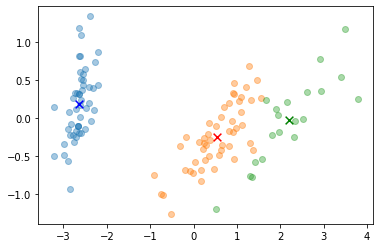

In [4]:
plt.scatter(set1['pca1'], set1['pca2'], alpha=0.4)
plt.scatter(centroid1[0],centroid1[1],marker='x',color='b',s=60)
plt.scatter(set2['pca1'], set2['pca2'], alpha=0.4)
plt.scatter(centroid2[0],centroid2[1],marker='x',color='r',s=60)
plt.scatter(set3['pca1'], set3['pca2'], alpha=0.4)
plt.scatter(centroid3[0],centroid3[1],marker='x',color='g',s=60)
plt.show()

The three data sets along with the three centroids have then been plotted to assure accurate centroid location. 

## Data Processing
The test data needs to be classified into the various clusters so that they can then be represented on a graph.

In [5]:
i=0
leftset=[]
rightset=[]
midset=[]

while i < int(test_data.shape[0]):
    left = sqrt(((centroid1[0] -test_data.iloc[i]['pca1'])**2)+((centroid1[1] -test_data.iloc[i]['pca2'])**2))
    mid = sqrt(((centroid2[0] -test_data.iloc[i]['pca1'])**2)+((centroid2[1] -test_data.iloc[i]['pca2'])**2))
    right = sqrt(((centroid3[0] -test_data.iloc[i]['pca1'])**2)+((centroid3[1] -test_data.iloc[i]['pca2'])**2))
    if left < mid:
        leftset.append(test_data.iloc[i])
    elif right < mid:
        rightset.append(test_data.iloc[i])
    else:
        midset.append(test_data.iloc[i])
    i +=1
    
leftDf = pd.DataFrame(leftset)
rightDf = pd.DataFrame(rightset)
midDf = pd.DataFrame(midset)

To begin with the entire data set needs to be iterated through; for each data value, the distance to each centroid needs to be calculated. This is done through pythagorean theorem, by taking the x and y points for both the centroid and new data point, the x and y distance can be calculated. With these sides, the final distance can be calculated and evaluated to understand which cluster the node belongs to. 
Once the cluster has been identified, the node is then added into a corresponding array, from which a dataframe is initialised.


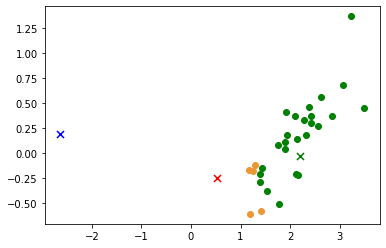

In [6]:
plt.scatter(rightDf['pca1'], rightDf['pca2'],color ='g')
plt.scatter(centroid1[0],centroid1[1],marker='x',color='b',s=50)
#plt.scatter(leftDf['pca1'], leftDf['pca2'])
plt.scatter(centroid2[0],centroid2[1],marker='x',color='r',s=50)
plt.scatter(midDf['pca1'], midDf['pca2'], color = '#eb9834')
plt.scatter(centroid3[0],centroid3[1],marker='x',color='g',s=50)
plt.show()

The three new dataframes are then plotted along with the inital centroids. As the graph shows, there are no data points within the test data that fall within the left side cluster. This could be due to an outdated training set, especially in malware which is a constantly moving field, this would then show a bias within the data that is being represented.

### Self-Assessment
---

For each criteria, please reflect on the marking rubric and indicate what grade you would expect to receive for the work that you are submitting. For your own personal development and learning, it is important to reflect on your work and to attempt to assess this careful. Do think carefully about both positive aspects of your work, as well as any limitations you may have faced.

- **Developing a suitable means to define each training data cluster centroid (20%)**: You estimate that your grade will be 100.

- **Developing a suitable means to classify test data into their respective groups and calculate classifier accuracy (40%)**  : You estimate that your grade will be 100.

- **Visualisation of cluster centroids and of group membership for test data (20%)**: You estimate that your grade will be 100.

- **Supporting commentary as documented using Markdown (20%)**: You estimate that your grade will be 100.

Please provide a minimum of two sentences to comment and reflect on your own self-assessment: I believe that I have accurately understood and completed the task specification. This was an interesting insight into how to analyse data and I believe it will be useful for the remaining coursework and potential future scenarios.
